In [1]:
import pandas as pd

# https://www.kaggle.com/code/rajeshjnv/mall-customer-visually-analysis-k-means/data
df = pd.read_csv('shopping-data.csv')


X = df.drop(columns=["CustomerID"])

X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [2]:
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler(feature_range=(1,99))

data_scaler.fit(X)

TX=data_scaler.transform(X)
print(TX)

X['Income']=TX[:,0]

X['Score']=TX[:,1]

[[ 1.         39.        ]
 [ 1.         81.        ]
 [ 1.80327869  6.        ]
 [ 1.80327869 77.        ]
 [ 2.60655738 40.        ]
 [ 2.60655738 76.        ]
 [ 3.40983607  6.        ]
 [ 3.40983607 94.        ]
 [ 4.21311475  3.        ]
 [ 4.21311475 72.        ]
 [ 4.21311475 14.        ]
 [ 4.21311475 99.        ]
 [ 5.01639344 15.        ]
 [ 5.01639344 77.        ]
 [ 5.01639344 13.        ]
 [ 5.01639344 79.        ]
 [ 5.81967213 35.        ]
 [ 5.81967213 66.        ]
 [ 7.42622951 29.        ]
 [ 7.42622951 98.        ]
 [ 8.2295082  35.        ]
 [ 8.2295082  73.        ]
 [ 9.03278689  5.        ]
 [ 9.03278689 73.        ]
 [11.44262295 14.        ]
 [11.44262295 82.        ]
 [11.44262295 32.        ]
 [11.44262295 61.        ]
 [12.24590164 31.        ]
 [12.24590164 87.        ]
 [13.04918033  4.        ]
 [13.04918033 73.        ]
 [15.45901639  4.        ]
 [15.45901639 92.        ]
 [15.45901639 14.        ]
 [15.45901639 81.        ]
 [16.26229508 17.        ]
 

In [3]:

from sklearn.cluster import KMeans

X = X[['Income','Score']]

from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
max_silhouette_score=0
best_n_clusters=0
for n_clusters in range_n_clusters:

    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    
    silhouette_avg = silhouette_score(X, model.labels_)
    if silhouette_avg>max_silhouette_score:
        max_silhouette_score=silhouette_avg
        best_n_clusters=n_clusters
    print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    round(silhouette_avg,2),
    )
print("Best n_cluster= ",best_n_clusters, " with silhouette score= ", round(max_silhouette_score,2))

For n_clusters = 2 The average silhouette_score is : 0.34
For n_clusters = 3 The average silhouette_score is : 0.45
For n_clusters = 4 The average silhouette_score is : 0.5
For n_clusters = 5 The average silhouette_score is : 0.56
For n_clusters = 6 The average silhouette_score is : 0.54
For n_clusters = 7 The average silhouette_score is : 0.44
For n_clusters = 8 The average silhouette_score is : 0.47
Best n_cluster=  5  with silhouette score=  0.56


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [4]:
n_clusters=best_n_clusters
kmeans = KMeans(n_clusters=n_clusters,random_state=0)

kmeans.fit(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

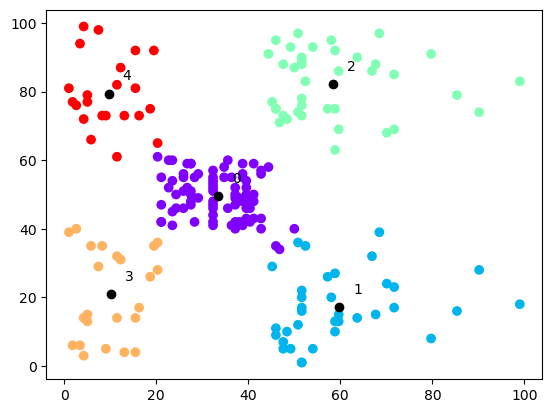

[33.36915604 59.8        58.46532156 10.0805417   9.61698957]
[49.51851852 17.11428571 82.12820513 20.91304348 79.36363636]


In [11]:
import matplotlib.pyplot as plt

X1 = X["Income"]

X2 = X["Score"]

plt.scatter(X1,X2, c=kmeans.labels_,  cmap='rainbow')

XCenters = kmeans.cluster_centers_[:,0]
YCenters = kmeans.cluster_centers_[:,1]

plt.scatter(XCenters ,YCenters, color='black')

for i in range(best_n_clusters):
    plt.annotate(
        i,
        xy=(XCenters[i], YCenters[i]), 
        textcoords='offset points',
        xytext=(10, 10))

plt.show()
print(XCenters)
print(YCenters)

In [7]:
cluster_map = pd.DataFrame()
cluster_map['CustomerID'] = df['CustomerID']

cluster_map['cluster'] = kmeans.labels_

cluster_map[cluster_map.cluster == 2]

,CustomerID,cluster
123,124,2
125,126,2
127,128,2
129,130,2
131,132,2
133,134,2
135,136,2
137,138,2
139,140,2
141,142,2
